In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleanData_LocationNum.csv')

#for column in df.columns: 
#    print(column)

Principal Component Analysis(PCA) to reduce the 145 columns

In [2]:
#Inital Shape
df.shape

(553, 144)

In [3]:
#Extracting Symptom columns for Model
brain_symptomDF = df.filter(like='Brain')

nervous_symptomDF = df.filter(like='Nervous')

diagnoses_df = df.filter(like='Diagnoses')

respiratory_symptomDF = df.filter(like='Respiratory')

digestive_symptomDF = df.filter(like='Digestive')

circulatory_symptomDF = df.filter(like='Circulatory')

skin_symptomDF = df.filter(like='Skin')

urinary_symptomDF = df.filter(like='Urinary')

immune_symptomDF = df.filter(like='Immune')

reproductive_symptomDF = df.filter(like='Reproductive')

eyes_ears_nose_throat_symptomDF = df.filter(like='Eyes, Ears, Nose, & Throat')

print(brain_symptomDF)

symptomDF = df.loc[:,'Diagnoses_hyperthyroid/hypothyroid':'Reproductive_hormoneimbalances']

(553, 11)


In [4]:
# Extracting location and mold columns for PCA analysis
location_moldDF = df.loc[:,'City':'Rhizopus stolonifer']
print(location_moldDF.shape)
#location_moldDF.columns

(553, 38)


In [5]:
# Just mold
moldDF = df.loc[:,'Aspergillus flavus/oryzae':'Rhizopus stolonifer']
print(moldDF.shape)
#moldDF.columns

(553, 36)


1. Standardaization

In [6]:
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(moldDF)


FCNN Model: Brain


Epoch 1/10
13/13 [==============================] - 1s 2ms/step - loss: 0.6448 - accuracy: 0.0568
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.1034
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.1525
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.1886
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.2300
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.2455
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.2481
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.2145
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.2506
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.2711
Test Accuracy: 0.2710

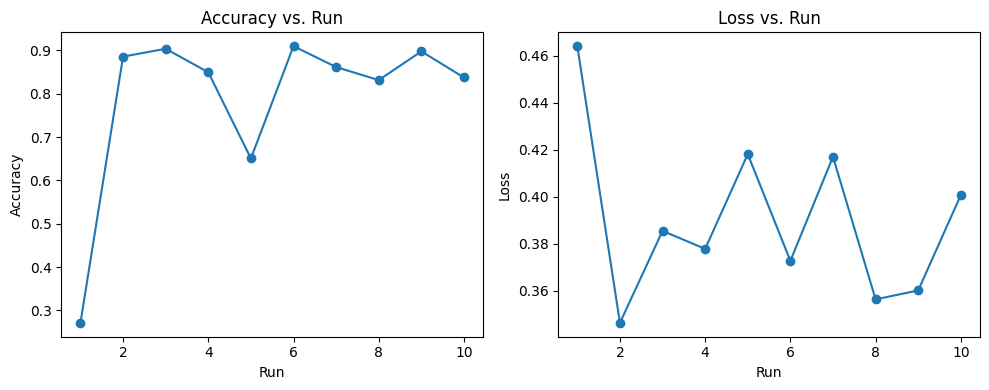

In [12]:
# Create empty lists to store results
accuracies = []
losses = []

# Number of runs
num_runs = 10

for _ in range(num_runs):
    X = data_std
    y = urinary_symptomDF

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")

    # Append results to lists
    accuracies.append(accuracy)
    losses.append(loss)

    
# Plot overall performance
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs + 1), accuracies, marker='o')
plt.title('Accuracy vs. Run')
plt.xlabel('Run')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_runs + 1), losses, marker='o')
plt.title('Loss vs. Run')
plt.xlabel('Run')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

All Symptoms

Epoch 1/10
13/13 [==============================] - 1s 1ms/step - loss: 68.1368 - accuracy: 0.0413
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 67.9727 - accuracy: 0.1059
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 68.0428 - accuracy: 0.1757
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 68.6828 - accuracy: 0.2119
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 69.5944 - accuracy: 0.2300
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 72.1782 - accuracy: 0.2351
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 75.6253 - accuracy: 0.1731
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 82.3159 - accuracy: 0.1499
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 90.8852 - accuracy: 0.1240
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 105.9294 - accuracy: 0.0482
Test Accur

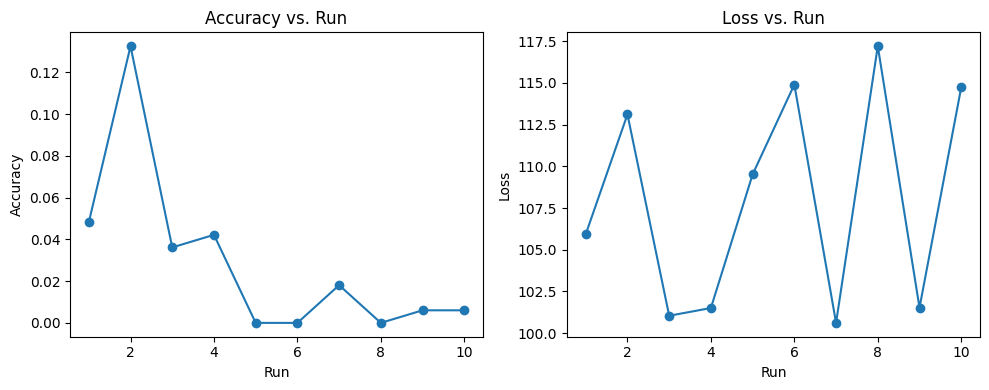

In [11]:
# Create empty lists to store results
accuracies = []
losses = []

# Number of runs
num_runs = 10

for _ in range(num_runs):
    # Assuming X and y are your features and labels
    X = data_std
    y = symptomDF

    # Split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Define the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")

    # Append results to lists
    accuracies.append(accuracy)
    losses.append(loss)

    
# Plot overall performance
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs + 1), accuracies, marker='o')
plt.title('Accuracy vs. Run')
plt.xlabel('Run')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_runs + 1), losses, marker='o')
plt.title('Loss vs. Run')
plt.xlabel('Run')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Create empty lists to store results
accuracies = []
losses = []

# Number of runs
num_runs = 10

for _ in range(num_runs):
    # Assuming X and y are your features and labels
    X = data_std
    y = symptomDF

    # Define the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy}")

    # Append results to lists
    accuracies.append(accuracy)
    losses.append(loss)

    
# Plot overall performance
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs + 1), accuracies, marker='o')
plt.title('Accuracy vs. Run')
plt.xlabel('Run')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_runs + 1), losses, marker='o')
plt.title('Loss vs. Run')
plt.xlabel('Run')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()